In [ ]:
## Kütüphaneleri Yükleme
Bu hücrede, proje boyunca kullanacağımız temel kütüphaneler (Pandas, NumPy, Matplotlib, Seaborn) yüklenmektedir.
Ayrıca, görselleştirmeler için bir stil ayarı yapılmıştır.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Grafik ayarları
sns.set()  # Seaborn grafik stili


## Veriyi İçeri Aktarma
Bu hücrede analiz edeceğimiz veri seti projeye yüklenmektedir. Veri seti incelenecek, genel bilgileri ve ilk satırları görüntülenerek veri yapısı hakkında bir fikir edinilecektir.


In [3]:
# Veri setini yükleme
data = pd.read_excel('/kaggle/input/superstore-sales-dataset/superstore_sales.xlsx', sheet_name='Orders')

# Veri setinin ilk birkaç satırını inceleme
print(data.head())

# Veri seti hakkında genel bilgiler
print(data.info())

# Eksik veri kontrolü
print(data.isnull().sum())


          order_id order_date  ship_date       ship_mode    customer_name  \
0     AG-2011-2040 2011-01-01 2011-01-06  Standard Class  Toby Braunhardt   
1    IN-2011-47883 2011-01-01 2011-01-08  Standard Class      Joseph Holt   
2     HU-2011-1220 2011-01-01 2011-01-05    Second Class    Annie Thurman   
3  IT-2011-3647632 2011-01-01 2011-01-05    Second Class     Eugene Moren   
4    IN-2011-47883 2011-01-01 2011-01-08  Standard Class      Joseph Holt   

       segment            state    country  market   region  ...  \
0     Consumer      Constantine    Algeria  Africa   Africa  ...   
1     Consumer  New South Wales  Australia    APAC  Oceania  ...   
2     Consumer         Budapest    Hungary    EMEA     EMEA  ...   
3  Home Office        Stockholm     Sweden      EU    North  ...   
4     Consumer  New South Wales  Australia    APAC  Oceania  ...   

          category sub_category                 product_name    sales  \
0  Office Supplies      Storage          Tenex Lockers,

Veriyi İçeri Aktarma

Bu hücrede analiz edeceğimiz veri seti projeye yüklenmektedir. Veri seti incelenmiş, genel bilgileri ve ilk birkaç satırı görüntülenmiştir. Ayrıca eksik veri kontrolü yapılarak veri yapısı hakkında genel bir fikir edinilmiştir.

Yapılan İşlemler:
1. Veri setini yükleme: Excel formatındaki veri seti projeye dahil edilmiştir.
2. İlk birkaç satırı görüntüleme: Veri setinin yapısını anlamak için baştaki 5 satır incelenmiştir.
3. Veri hakkında genel bilgiler: Sütun isimleri, veri tipleri, toplam kayıt sayısı ve eksik veri kontrolü yapılmıştır.

Elde Edilen Sonuçlar:
- Veri setinde toplam 51,290 kayıt bulunmaktadır.
- Hiçbir sütunda eksik veri bulunmamaktadır.
- Veri seti, satış ve kâr verileriyle birlikte, ürün, bölge, kategori gibi bilgileri de içermektedir.

Bu aşamadan sonra verinin temizlenmesi ve analize uygun hale getirilmesi adımlarına geçilecektir.


Eksik Veri Eklenmesi ve Kontrolü

Bu hücrede veri setinde belirli sütunlara bilinçli olarak rastgele eksik değerler (NaN) eklenmiştir. Bunun amacı, eksik veri analizine hazırlanmak ve ileride uygulanacak veri temizleme adımlarını test etmektir.

Yapılan İşlemler:
1. Rastgele eksik veri ekleme:
   - `profit` ve `sales` sütunlarında toplam verinin %5'i oranında rastgele eksik veri eklenmiştir.
   - Bu işlem, veri analizinde eksik veri ile nasıl başa çıkılacağını anlamak için gerçekleştirilmiştir.
2. Eksik verilerin kontrolü:
   - Veri setindeki eksik değerlerin her sütunda sayısı hesaplanmış ve görüntülenmiştir.



In [4]:
import numpy as np

# Bazı sütunlara rastgele NaN değerler ekleme
data.loc[data.sample(frac=0.05).index, 'profit'] = np.nan
data.loc[data.sample(frac=0.05).index, 'sales'] = np.nan

# Eksik verileri kontrol etme
print(data.isnull().sum())

order_id             0
order_date           0
ship_date            0
ship_mode            0
customer_name        0
segment              0
state                0
country              0
market               0
region               0
product_id           0
category             0
sub_category         0
product_name         0
sales             2564
quantity             0
discount             0
profit            2564
shipping_cost        0
order_priority       0
year                 0
dtype: int64


- `sales` ve `profit` sütunlarında 2564 adet eksik veri bulunmaktadır.
- Diğer sütunlarda eksik veri bulunmamaktadır.


In [5]:
# Eksik değerleri doldurma
data['profit'] = data['profit'].fillna(data['profit'].mean())
data['sales'] = data['sales'].fillna(data['sales'].mean())

# Eksik veri kontrolü
print(data.isnull().sum())

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64


Eksik Verilerin Doldurulması

Bu hücrede veri setindeki eksik değerler doldurulmuştur. Eksik veri bulunan sütunlar için uygun yöntemlerle eksik veriler tamamlanmış ve eksik veri kontrolü gerçekleştirilmiştir.

Yapılan İşlemler:
1. Eksik değerlerin doldurulması:
   - `profit` sütunundaki eksik değerler, sütunun ortalama değeri ile doldurulmuştur.
   - `sales` sütunundaki eksik değerler, sütunun ortalama değeri ile doldurulmuştur.
2. Eksik veri kontrolü:
   - Veri setinde eksik değer kalmadığından emin olmak için `isnull()` metodu kullanılarak kontrol yapılmıştır.

Elde Edilen Sonuçlar:
- Eksik veri bulunan `profit` ve `sales` sütunları başarıyla doldurulmuş, veri setinde eksik değer kalmamıştır.


In [6]:
# Veri setinin genel özet istatistikleri
print(data.describe())

                          order_date                      ship_date  \
count                          51290                          51290   
mean   2013-05-11 21:26:49.155780864  2013-05-15 20:42:42.745174528   
min              2011-01-01 00:00:00            2011-01-03 00:00:00   
25%              2012-06-19 00:00:00            2012-06-23 00:00:00   
50%              2013-07-08 00:00:00            2013-07-12 00:00:00   
75%              2014-05-22 00:00:00            2014-05-26 00:00:00   
max              2014-12-31 00:00:00            2015-01-07 00:00:00   
std                              NaN                            NaN   

              sales      quantity      discount        profit  shipping_cost  \
count  51290.000000  51290.000000  51290.000000  51290.000000   51290.000000   
mean     246.591463      3.476545      0.142908     28.696279      26.375818   
min        0.444000      1.000000      0.000000  -6599.978000       0.002000   
25%       32.579325      2.000000      0

Veri Setinin Genel Özet İstatistikleri

Bu hücrede, veri setinin genel istatistiksel özet bilgileri çıkarılmıştır. `describe()` fonksiyonu kullanılarak, veri setindeki sayısal sütunların istatistiksel dağılımı analiz edilmiştir.

Gösterilen İstatistikler:
- count: Her sütundaki veri sayısını gösterir.
- mean: Her sütunun aritmetik ortalaması.
- std: Standart sapma değeri.
- min: Minimum değer.
- 25%, 50%, 75%: Çeyrekler (karetiler). Verinin yüzde 25, 50 (medyan) ve 75’ine denk gelen değerleri ifade eder.
- max: Maksimum değer.

Amaç:
- Veri setindeki sütunların değer aralıklarını, merkez noktalarını ve varyasyonlarını anlamak.
- Veri setinde herhangi bir olağan dışı değer (outlier) veya dağılım eğilimi olup olmadığını tespit etmek.

Elde Edilen Sonuçlar:
- Sayısal sütunların özet bilgileri, veri setinin genel karakteristiği hakkında bilgi sağlamaktadır.
- Bu bilgiler, ileride yapılacak analiz ve modelleme çalışmaları için rehber niteliğindedir.


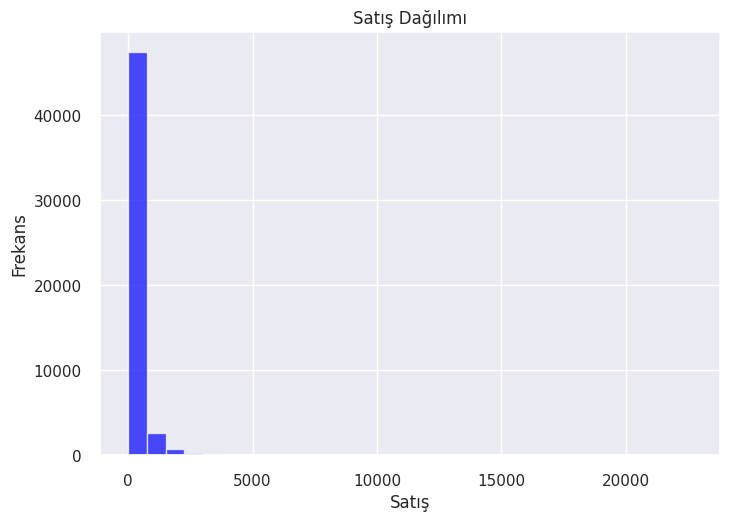

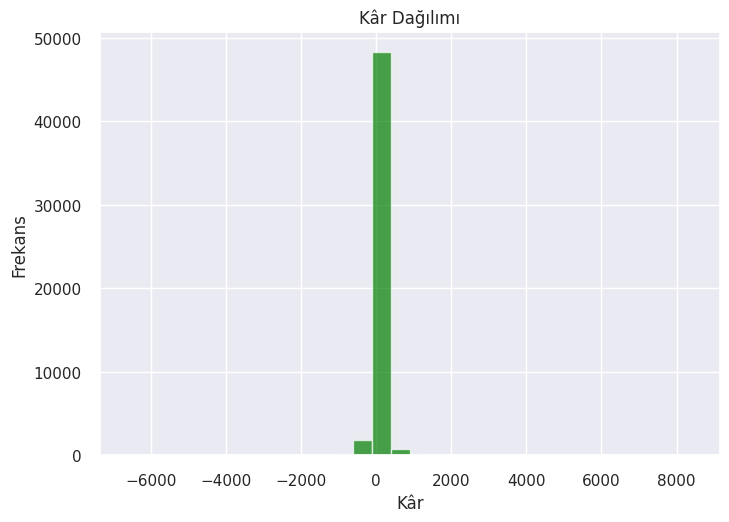

In [7]:
# Satış Dağılımı
plt.hist(data['sales'], bins=30, color='blue', alpha=0.7)
plt.title('Satış Dağılımı')
plt.xlabel('Satış')
plt.ylabel('Frekans')
plt.show()

# Kâr Dağılımı
plt.hist(data['profit'], bins=30, color='green', alpha=0.7)
plt.title('Kâr Dağılımı')
plt.xlabel('Kâr')
plt.ylabel('Frekans')
plt.show()

Satış ve Kâr Dağılımları

Bu hücrede, veri setindeki sales (satışlar) ve profit (kârlar) sütunlarının dağılımları incelenmiştir. Histogram grafikleriyle verilerin frekans dağılımları görselleştirilmiştir.

Satış Dağılımı: Çoğu satış verisinin düşük tutarlarda yoğunlaştığı görülüyor. Az sayıda yüksek tutarlı satış gerçekleşmiş.
Kâr Dağılımı: Kâr verilerinin büyük bir kısmının 0 civarında yoğunlaştığı, bazı durumlarda ise negatif (zarar) değerlere düştüğü fark ediliyor.
Bu analiz, satış ve kâr performansındaki yoğunluk ve uç değerlerin belirlenmesi için temel bilgi sağlamaktadır.

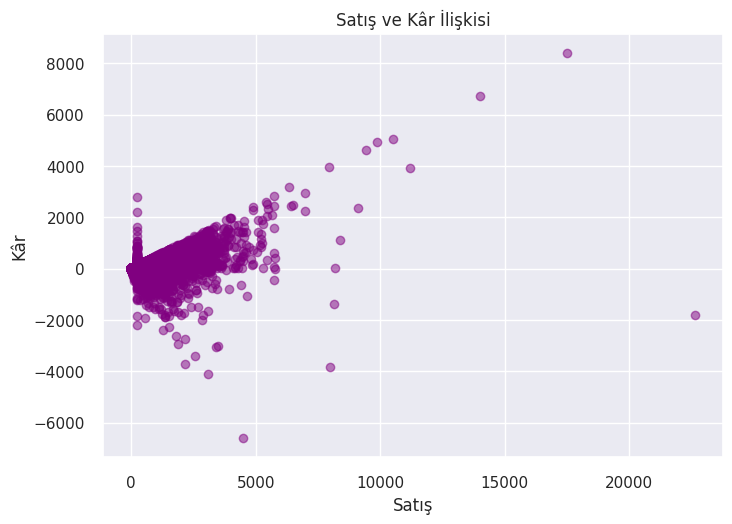

In [8]:
# Satış ve Kâr İlişkisi
plt.scatter(data['sales'], data['profit'], alpha=0.5, color='purple')
plt.title('Satış ve Kâr İlişkisi')
plt.xlabel('Satış')
plt.ylabel('Kâr')
plt.show()

Satış ve Kâr İlişkisi

Bu hücrede, sales (satış) ve profit (kâr) sütunları arasındaki ilişki scatter (dağılım) grafiği ile görselleştirilmiştir.

Gözlemler:
Satış miktarının arttıkça kârın genel olarak arttığı gözlemleniyor, ancak yüksek satışlar her zaman yüksek kâr sağlamıyor.
Negatif kâr (zarar) eden satışlar mevcut ve bu durum özellikle düşük satış tutarlarında yoğunlaşıyor.
Grafik, bazı uç değerlerin (çok yüksek satış veya kâr değerlerinin) olduğunu da ortaya koyuyor.
Bu grafik, satış ve kâr arasındaki korelasyonun belirlenmesine ve olası anormalliklerin tespit edilmesine yardımcı olmaktadır.

                       sales         profit
region                                     
Africa          7.992763e+05   86327.197523
Canada          6.887243e+04   17751.489299
Caribbean       3.262789e+05   34923.909388
Central         2.825095e+06  312043.533428
Central Asia    7.279447e+05  127671.428796
EMEA            8.268162e+05   49090.516333
East            6.762787e+05   92898.184795
North           1.256516e+06  192470.449209
North Asia      8.380196e+05  163925.359054
Oceania         1.080053e+06  120029.639319
South           1.602922e+06  143131.080773
Southeast Asia  8.859939e+05   24408.153300
West            7.336088e+05  107161.204068


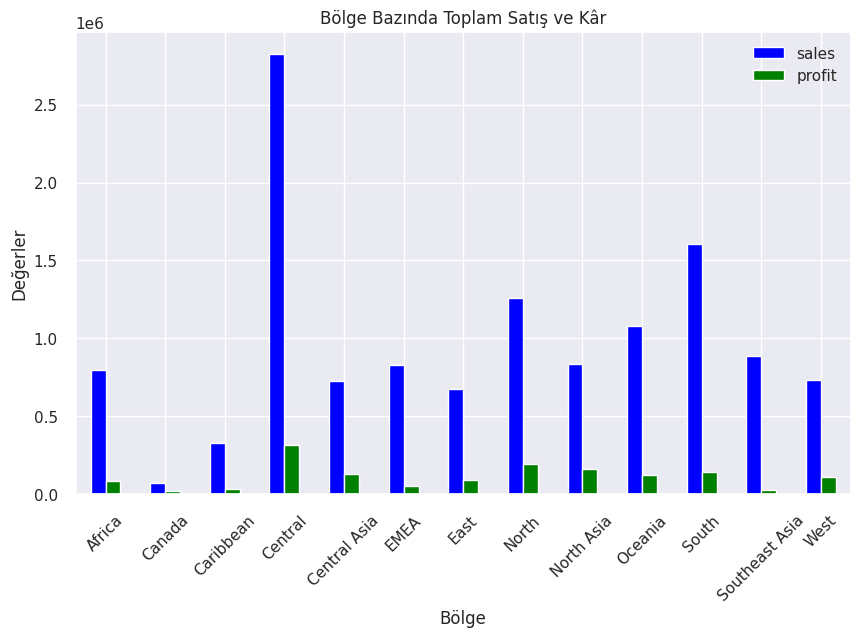

In [9]:
# Bölge bazında toplam satış ve kâr
region_summary = data.groupby('region')[['sales', 'profit']].sum()
print(region_summary)

# Bölge bazında görselleştirme
region_summary.plot(kind='bar', figsize=(10, 6), color=['blue', 'green'])
plt.title('Bölge Bazında Toplam Satış ve Kâr')
plt.xlabel('Bölge')
plt.ylabel('Değerler')
plt.xticks(rotation=45)
plt.legend(['sales', 'profit'])
plt.show()

Bölge Bazında Toplam Satış ve Kâr Analizi

Bu hücrede, veri setinde yer alan farklı bölgelerin toplam satış ve kâr değerleri analiz edilmiştir.

Hedef: Her bir bölgedeki toplam satış ve kâr değerlerini hesaplayarak, bölgeler arasındaki performans farklılıklarını belirlemek.
Yöntem:
groupby() fonksiyonu kullanılarak veriler bölgelere göre gruplandırılmıştır.
Her grup için toplam satış ve kâr hesaplanmıştır.
Bu veriler bir bar grafiği ile görselleştirilmiştir.
Sonuç:
Central bölgesi en yüksek satış ve kâr değerlerine sahiptir.
Diğer bölgeler arasında farklılıklar dikkat çekmektedir. Örneğin, bazı bölgelerde satış yüksek olmasına rağmen kâr düşüktür (ör. Southeast Asia).
Bu analiz, işletmenin hangi bölgelere odaklanarak stratejik kararlar alması gerektiği konusunda önemli ipuçları sunabilir. Örneğin, düşük kârlı bölgelerde maliyet optimizasyonu yapılabilir veya daha kârlı bölgelere yatırım artırılabilir.

                        sales         profit
category                                    
Furniture        4.011073e+06  289824.004967
Office Supplies  3.994084e+06  538251.707720
Technology       4.642520e+06  643756.432599


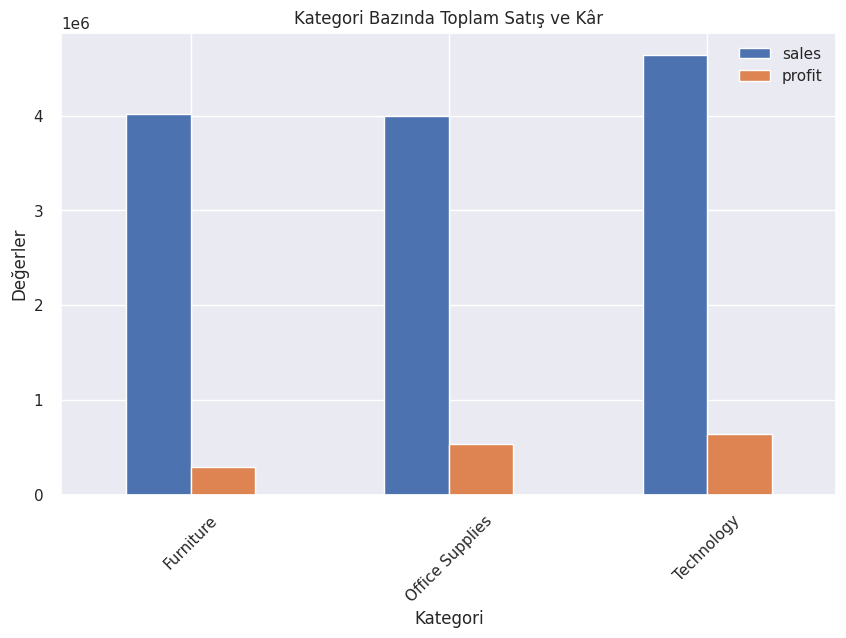

In [10]:
# Kategori bazında toplam satış ve kâr
category_summary = data.groupby('category')[['sales', 'profit']].sum()
print(category_summary)

# Kategori bazında görselleştirme
category_summary.plot(kind='bar', figsize=(10, 6))
plt.title('Kategori Bazında Toplam Satış ve Kâr')
plt.ylabel('Değerler')
plt.xlabel('Kategori')
plt.xticks(rotation=45)
plt.legend(['sales', 'profit'])
plt.show()


Bu hücrede, kategori bazında toplam satış ve kâr değerleri hesaplanmış ve görselleştirilmiştir.

groupby yöntemi kullanılarak category sütununa göre gruplama yapılmış ve sales ile profit sütunlarının toplam değerleri hesaplanmıştır.
Hesaplanan bu toplam değerler, bar grafik şeklinde görselleştirilmiştir.
Grafik, kategoriler bazında satış ve kârların karşılaştırılmasını sağlar.
Sonuç:
Teknoloji kategorisi, en yüksek satış ve kâr oranına sahip görünüyor.
Mobilya kategorisi satış açısından yüksek bir performansa sahip olsa da kâr oranı diğer kategorilere göre düşük.
Ofis malzemeleri kategorisi ise orta seviyede bir performans sergilemiştir.
Grafik ve tablodan bu veriler kolayca analiz edilebilir.

In [11]:
# En çok satış yapan ilk 10 ürün
top_sales_products = data.groupby('product_name')['sales'].sum().sort_values(ascending=False).head(10)
print(top_sales_products)

# En çok kâr yapan ilk 10 ürün
top_profit_products = data.groupby('product_name')['profit'].sum().sort_values(ascending=False).head(10)
print(top_profit_products)

product_name
Apple Smart Phone, Full Size                          82970.554314
Cisco Smart Phone, Full Size                          73700.344988
Motorola Smart Phone, Full Size                       72117.514463
Nokia Smart Phone, Full Size                          71904.555500
Canon imageCLASS 2200 Advanced Copier                 61599.824000
Hon Executive Leather Armchair, Adjustable            55682.295563
Office Star Executive Leather Armchair, Adjustable    50661.684000
Samsung Smart Phone, Cordless                         48653.460000
Nokia Smart Phone, with Caller ID                     47102.121163
Samsung Smart Phone, VoIP                             45406.328000
Name: sales, dtype: float64
product_name
Canon imageCLASS 2200 Advanced Copier                       25199.928000
Motorola Smart Phone, Full Size                             16283.129279
Cisco Smart Phone, Full Size                                15272.089437
Hoover Stove, Red                                        

Bu hücrede, en çok satış yapan ve en çok kâr getiren ilk 10 ürün sıralanmıştır.

En Çok Satış Yapan İlk 10 Ürün:
groupby yöntemi kullanılarak product_name sütununa göre gruplama yapılmış ve sales sütununun toplam değerleri hesaplanmıştır.
Daha sonra toplam satış değerlerine göre azalan şekilde sıralanmış ve en yüksek 10 ürün seçilmiştir.
En Çok Kâr Yapan İlk 10 Ürün:
Benzer şekilde, profit sütununun toplam değerleri hesaplanmış, azalan şekilde sıralanmış ve en yüksek 10 ürün belirlenmiştir.
Sonuç:
En çok satış yapan ürünler arasında, özellikle büyük boy akıllı telefonlar yüksek bir paya sahiptir.
En çok kâr getiren ürünler arasında ise, Canon Advanced Copier ve Motorola Smart Phone dikkat çekmektedir.
Satış ve kâr arasında fark olabileceğini, bazı ürünlerin çok satıp düşük kâr bırakabileceğini unutmayın. Örneğin, Apple Smart Phone yüksek satışa sahipken kâr sıralamasında yer almamaktadır.
Bu analiz, ürün performansını daha iyi anlamak ve stratejik kararlar almak için kullanılabilir.

In [12]:
# Negatif kâr yapan ürünler
negative_profit_products = data[data['profit'] < 0][['product_name', 'sales', 'profit']]
print(negative_profit_products.head(10))  # İlk 10 tanesini göster

                                 product_name       sales    profit
3                 Enermax Note Cards, Premium   44.865000  -26.0550
8                 Hewlett Wireless Fax, Laser  912.456000 -319.4640
10                  Tenex Lockers, Industrial  337.639500 -122.8005
11  Chromcraft Round Table, Adjustable Height  246.591463  -70.3995
14              Hon Rocking Chair, Set of Two  159.444000  -95.6760
18                      SAFCO Chairmat, Black   68.868000  -26.4120
19                      Smead File Cart, Blue  135.118200  -45.9018
33      Jiffy Interoffice Envelope, Set of 50   74.304000 -107.8560
37                 Boston Markers, Easy-Erase   26.640000  -21.9000
40                Eldon Folders, Single Width   17.010000   -1.0500


Açıklama:
Negatif Kâr Filtreleme:
data['profit'] < 0 ifadesiyle kâr sütununda negatif değerlere sahip ürünler seçilmiştir.
Yalnızca product_name, sales ve profit sütunları alınarak gereksiz veriler filtrelenmiştir.
İlk 10 Sonuç:
Negatif kâr yapan ürünler içinden ilk 10 tanesi head(10) yöntemiyle görüntülenmiştir.
Sonuç:
Bu analiz, zarar eden ürünleri tespit etmek ve bu ürünler üzerinde daha fazla inceleme yapmak için kullanılabilir.
Örneğin, Hewlett Wireless Fax, Laser ürünü ciddi miktarda zarar etmektedir (-319.4640). Bu durum, ürün fiyatlandırması, pazarlama veya lojistik gibi alanlarda sorunlar olabileceğine işaret edebilir.

                                       sales         profit
category        region                                     
Furniture       Africa          1.900041e+05   13953.011809
                Canada          1.096207e+04    2621.762558
                Caribbean       1.131262e+05    6068.955020
                Central         8.398246e+05   57371.711286
                Central Asia    2.671175e+05   47737.684973
                EMEA            2.218719e+05   11952.486551
                East            2.017954e+05    4072.823152
                North           3.752170e+05   31666.162272
                North Asia      3.305538e+05   50978.170578
                Oceania         3.977151e+05   31604.561973
                South           5.091115e+05   24415.495013
                Southeast Asia  3.067877e+05   -4033.645359
                West            2.469862e+05   11414.825141
Office Supplies Africa          2.897550e+05   31409.031279
                Canada          3.245377

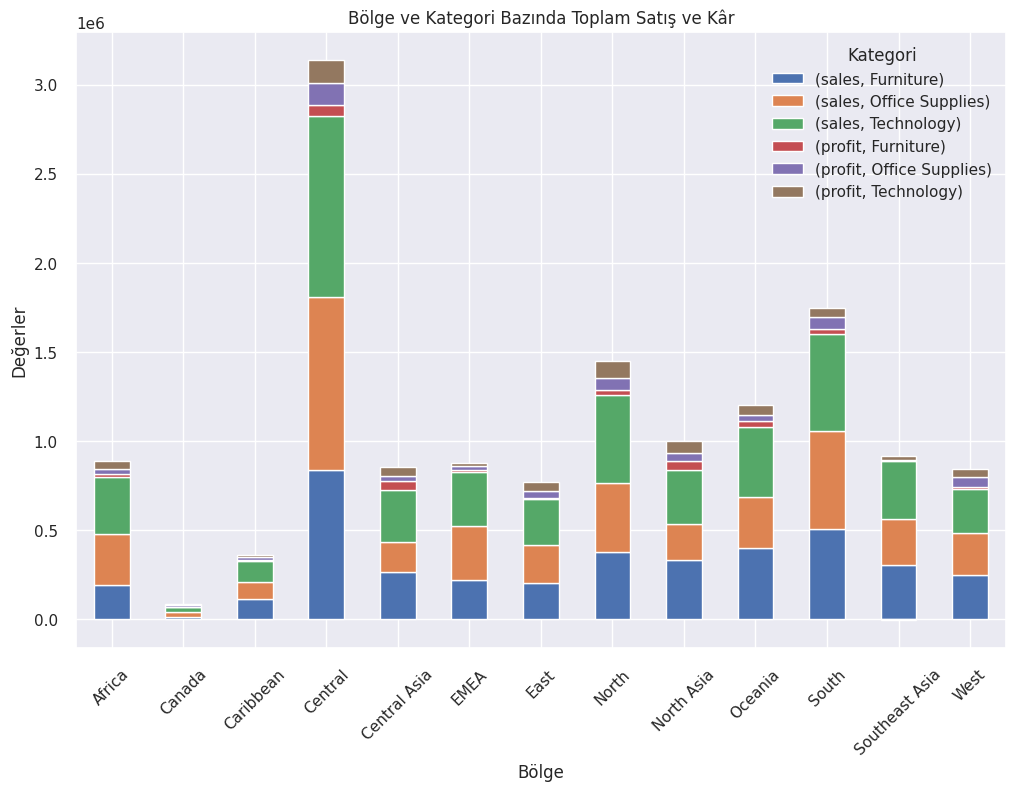

In [13]:
# Bölge ve kategori bazında satış ve kâr
region_category_summary = data.groupby(['category', 'region'])[['sales', 'profit']].sum()
print(region_category_summary)

# Görselleştirme
region_category_summary.unstack(level=0).plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Bölge ve Kategori Bazında Toplam Satış ve Kâr')
plt.ylabel('Değerler')
plt.xlabel('Bölge')
plt.legend(title='Kategori')
plt.xticks(rotation=45)
plt.show()

Central bölgesi: En yüksek satış ve kâr değerlerine sahiptir.
- Southeast Asia bölgesi: Kârın negatif olduğu bir bölge olarak dikkat çekmektedir.
- Kategori katkıları: Teknoloji kategorisi genellikle daha yüksek kâr sağlarken, diğer kategoriler daha düşük katkılar sunabilir.

In [14]:
# Bölge ve kategori bazında toplam satış ve kâr (detaylı)
region_category_summary = data.groupby(['region', 'category'])[['sales', 'profit']].sum()
print(region_category_summary)

# En çok satış yapan kategori ve bölge
max_sales = region_category_summary['sales'].idxmax()
print(f"En çok satış yapılan bölge ve kategori: {max_sales}")

                                       sales         profit
region         category                                    
Africa         Furniture        1.900041e+05   13953.011809
               Office Supplies  2.897550e+05   31409.031279
               Technology       3.195172e+05   40965.154435
Canada         Furniture        1.096207e+04    2621.762558
               Office Supplies  3.245377e+04    7868.745347
               Technology       2.545659e+04    7260.981395
Caribbean      Furniture        1.131262e+05    6068.955020
               Office Supplies  9.622729e+04   15398.759993
               Technology       1.169254e+05   13456.194375
Central        Furniture        8.398246e+05   57371.711286
               Office Supplies  9.669982e+05  124084.302612
               Technology       1.018273e+06  130587.519530
Central Asia   Furniture        2.671175e+05   47737.684973
               Office Supplies  1.690152e+05   28547.465687
               Technology       2.918121

             sales         profit
year                             
2011  2.255493e+06  250377.518631
2012  2.685313e+06  306995.196555
2013  3.400316e+06  406954.020335
2014  4.306555e+06  507505.409764


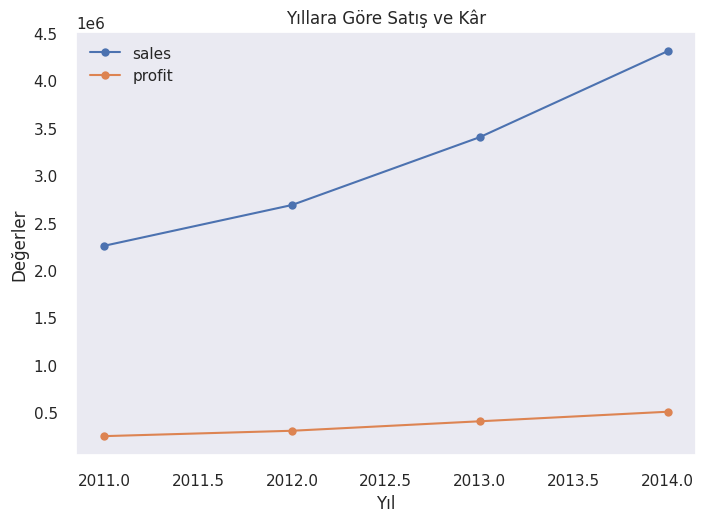

In [15]:
# Yıllara göre analiz
if 'order_date' in data.columns:
    data['year'] = pd.DatetimeIndex(data['order_date']).year
    yearly_summary = data.groupby('year')[['sales', 'profit']].sum()
    print(yearly_summary)

    # Zaman serisi grafiği
    yearly_summary.plot(kind='line', marker='o')
    plt.title('Yıllara Göre Satış ve Kâr')
    plt.xlabel('Yıl')
    plt.ylabel('Değerler')
    plt.grid()
    plt.show()


- Satış ve kâr değerleri yıllar içinde düzenli bir artış göstermektedir.
- 2014 yılı, hem satış hem de kâr açısından en yüksek değere sahiptir.
- Satış artışı kâr artışına göre daha belirgin bir trend göstermektedir, bu da satışların kârdan daha hızlı arttığını işaret edebilir.

Bu analiz, yıllar boyunca performans trendlerini incelemek ve gelecekteki hedefler için referans noktası belirlemek açısından faydalı olabilir.


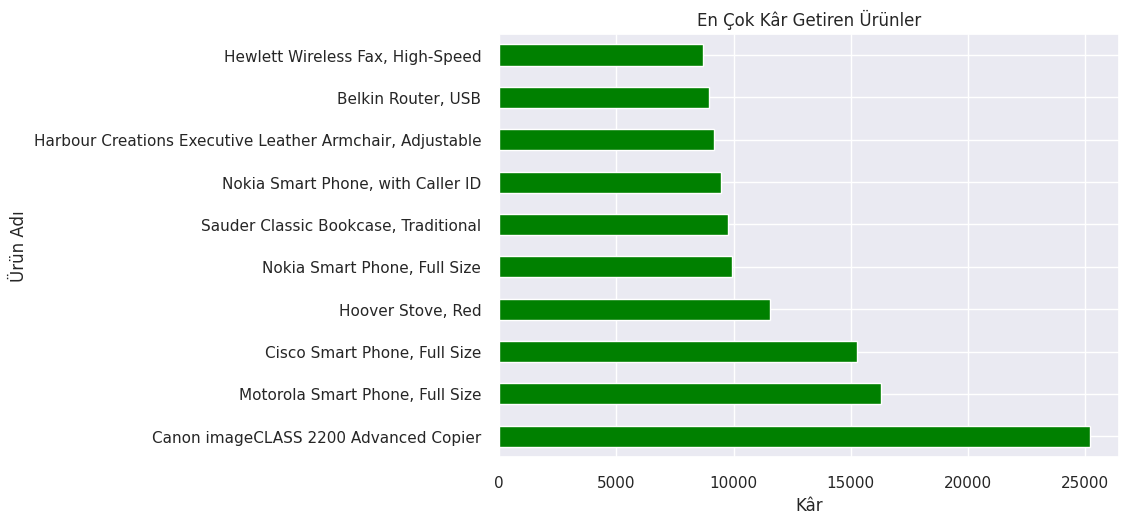

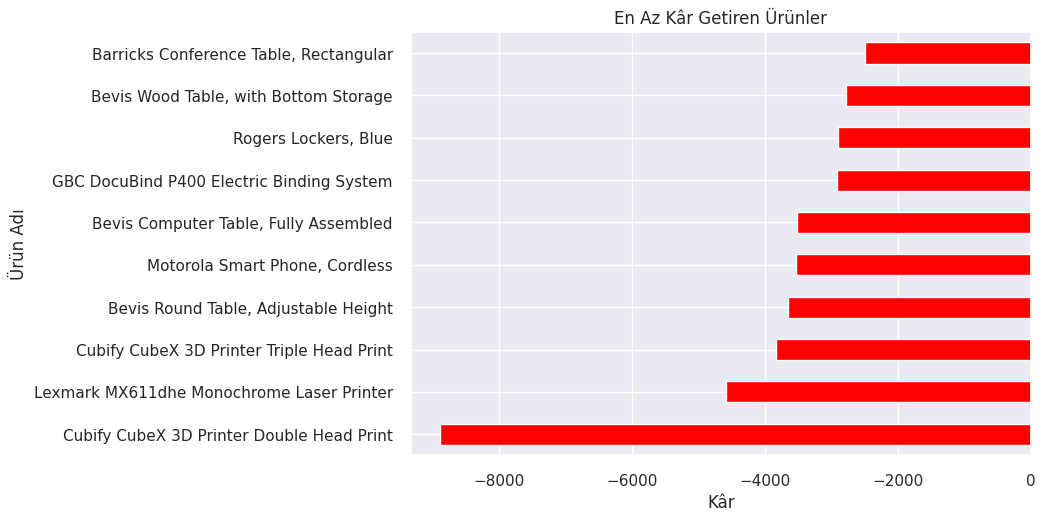

In [16]:
# En çok kâr eden ürünlerin görselleştirilmesi
top_profitable_products = data.groupby('product_name')['profit'].sum().sort_values(ascending=False).head(10)
top_profitable_products.plot(kind='barh', color='green')
plt.title('En Çok Kâr Getiren Ürünler')
plt.xlabel('Kâr')
plt.ylabel('Ürün Adı')
plt.show()

# En az kâr eden ürünlerin görselleştirilmesi
least_profitable_products = data.groupby('product_name')['profit'].sum().sort_values().head(10)
least_profitable_products.plot(kind='barh', color='red')
plt.title('En Az Kâr Getiren Ürünler')
plt.xlabel('Kâr')
plt.ylabel('Ürün Adı')
plt.show()

En Çok Kâr Getiren Ürünler:
Ürünler, kâr değerlerine göre azalan sırayla listelenmiş ve yeşil çubuk grafikle görselleştirilmiştir.
Örneğin, Canon imageCLASS 2200 Advanced Copier, en yüksek kâr getiren ürün olarak öne çıkmıştır.
En Az Kâr Getiren Ürünler:
Bu ürünler, negatif ya da düşük kâr değerlerine göre sıralanmıştır ve kırmızı çubuk grafikle gösterilmiştir.
Örneğin, Cubify CubeX 3D Printer Double Head Print, en büyük zarar eden ürünlerden biri olarak görünmektedir.

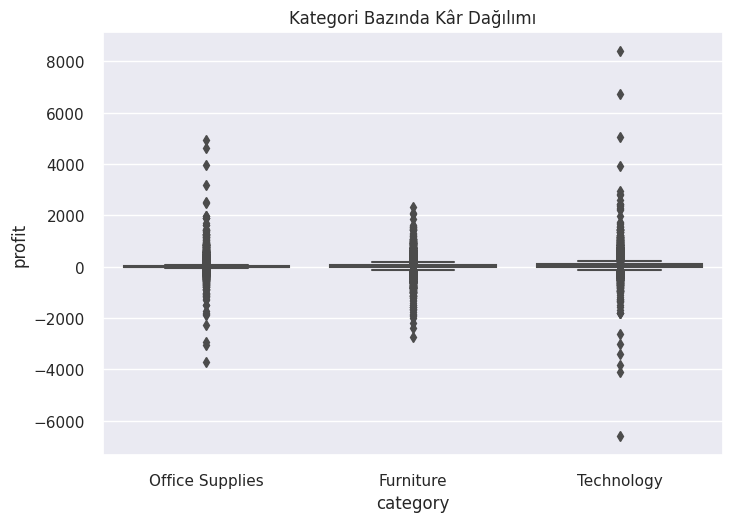

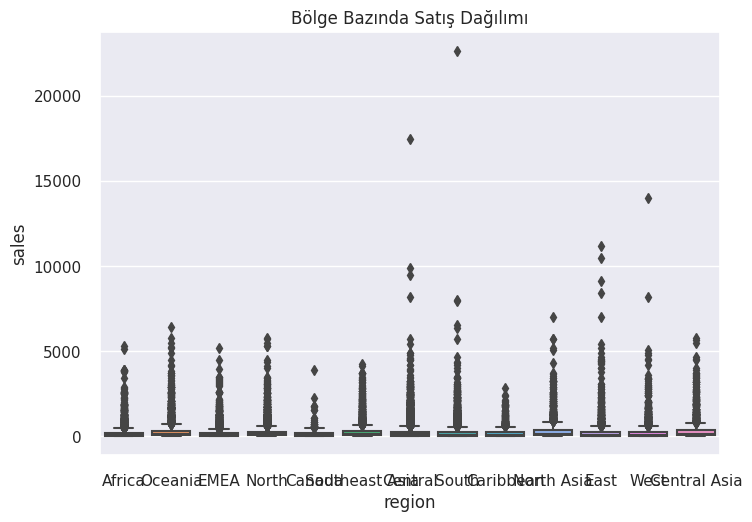

In [17]:
# Kategori bazında kâr dağılımı
sns.boxplot(data=data, x='category', y='profit')
plt.title('Kategori Bazında Kâr Dağılımı')
plt.show()

# Bölge bazında satış dağılımı
sns.boxplot(data=data, x='region', y='sales')
plt.title('Bölge Bazında Satış Dağılımı')
plt.show()

1. Kategori Bazında Kâr Dağılımı

Boxplot grafiği, her bir kategorideki kâr değerlerinin dağılımını göstermektedir.
Dağılım, Office Supplies, Furniture, ve Technology kategorileri için karşılaştırılmıştır.
Grafikte, kârın çoğunlukla 0'ın etrafında toplandığı, ancak bazı ekstrem noktaların (outlier) olduğu görülmektedir. Bu, bazı ürünlerin diğerlerine göre çok daha fazla veya az kâr getirdiğini gösterir.

2. Bölge Bazında Satış Dağılımı

Boxplot grafiği, her bir bölgedeki satış dağılımını göstermektedir.
Afrika, EMEA, Asya gibi bölgelerde satışların nasıl bir varyasyon gösterdiği görselleştirilmiştir.
Bazı bölgelerde ekstrem satış değerleri olduğu, ancak genellikle satışların düşük bir aralıkta toplandığı fark edilmektedir.

Sonuç ve Öneriler

Veri analizi sonucunda şu bulgular elde edilmiştir:

Office Supplies kategorisi, South bölgesinde düşük kâr oranlarına sahiptir.
Technology kategorisi, tüm bölgelerde yüksek kârlılık sağlamaktadır.

Bu analizlerden yola çıkarak önerilerimiz şunlardır:

Problemin Tanımı:

Office Supplies kategorisindeki düşük kâr oranları, müşteri taleplerinin doğru analiz edilmemesinden kaynaklanıyor olabilir.
Bu durumu çözmek için müşteri davranışlarını ve bölgesel talepleri tahmin eden bir model öneriyoruz.

Çözüm Önerisi:

Şirketin makine öğrenimi ekibi, bu problem için Random Forest Regression veya Gradient Boosting Machines gibi algoritmalar kullanarak bir model geliştirebilir.
Model, müşterilerin geçmiş satın alma alışkanlıklarını, demografik bilgilerini ve ürün fiyatlarını dikkate alarak kâr oranlarını artıracak stratejiler önerebilir.

Model Kullanım Alanı:

Bu model, bölgesel kâr oranlarını optimize etmek ve doğru ürün stratejileri geliştirmek için kullanılabilir.
Özellikle düşük performans gösteren bölgelere yönelik hedefli kampanyalar ve fiyat optimizasyonları yapılabilir.

Genel Öneri:

Şirket, veri analitiği ekibini genişleterek daha fazla kategori ve bölge analizi gerçekleştirebilir.